In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cosinorage.dataloaders import SmartwatchDataLoader, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2


## Raw Accelerometer Data obtained from Smartwatch

### Preprocessed Data


In [2]:
reload_smartwatch_p = True

In [3]:
preprocess_args = {
    'autocalib_tol': 10e-15,
    'autocalib_max_iter': 500,
    'autocalib_epoch_size': 20,
    'filter_type': 'lowpass',
    'filter_cutoff': 2
}

In [4]:
if reload_smartwatch_p:
    smartwatch_loader_p = SmartwatchDataLoader(smartwatch_file_dir='../data/smartwatch/62164/', preprocess=True, preprocess_args=preprocess_args)
    smartwatch_loader_p.load_data(verbose=True)
    with open("pickle/smartwatch_loader_p.pkl", "wb") as file:
        pickle.dump(smartwatch_loader_p, file)
else:
    with open("pickle/smartwatch_loader_p.pkl", "rb") as file:
        smartwatch_loader_p = pickle.load(file)

Loading CSV files: 100%|██████████| 145/145 [00:13<00:00, 10.76it/s]


Loaded 41760000 accelerometer data records from ../data/smartwatch/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage


Calibrating:  35%|███▍      | 174/500 [02:38<04:56,  1.10iter/s]


Convergence reached at iteration 175
Calibration successful.
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Preprocessed accelerometer data
Calculated ENMO for 34560000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
load_data executed in 257.64 seconds


100%|██████████| 479/479 [00:00<00:00, 240463.39it/s]


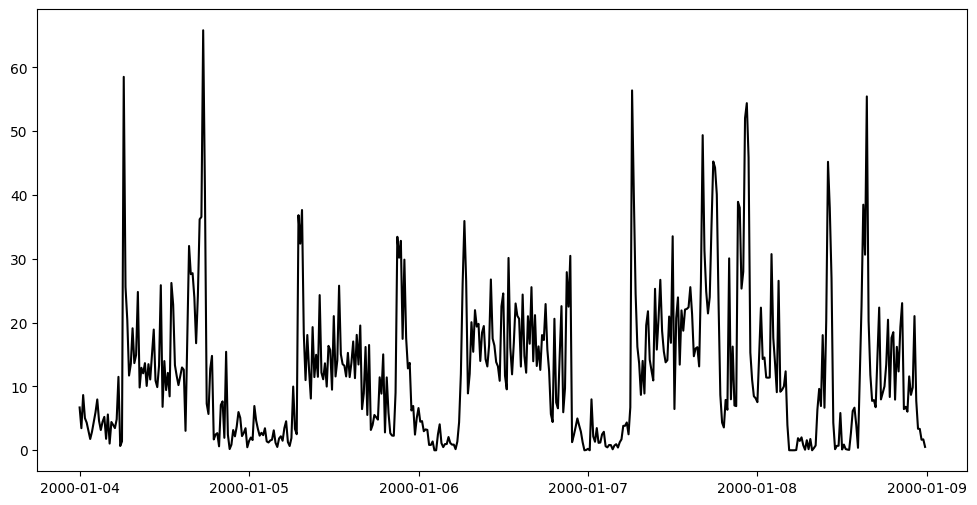

In [5]:
plot_orig_enmo(smartwatch_loader_p)

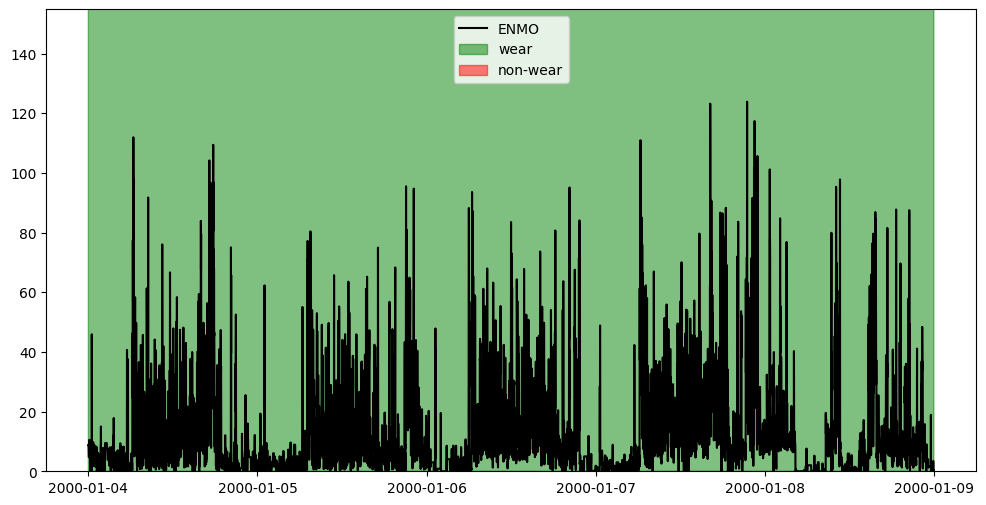

In [6]:
plot_enmo(smartwatch_loader_p)

In [7]:
smartwatch_loader_p.get_meta_data()

{'datasource': 'smartwatch',
 'original_freq': 80.0,
 'initial calibration error': 0.01961031514328714,
 'final calibration error': 0.004237092019937931,
 'offset': array([ 0.02801617, -0.04117217, -0.01426816]),
 'scale': array([0.99622009, 0.99902592, 0.99940628]),
 'total time': 431999.9875,
 'wear time': 426600.0,
 'non-wear time': 5399.987499999988}

In [8]:
data = smartwatch_loader_p.get_acc_data()
data.head()

,X,Y,Z,X_raw,Y_raw,Z_raw,wear,ENMO
TIMESTAMP,,,,,,,,
2000-01-04 00:00:00.000000,-0.705621,0.008729,0.715713,-0.736,0.050,0.730,1.0,5.098028
2000-01-04 00:00:00.012500,-0.705585,0.009554,0.716015,-0.736,0.056,0.730,1.0,5.295490
2000-01-04 00:00:00.025000,-0.705557,0.010363,0.716323,-0.739,0.050,0.730,1.0,5.503425
2000-01-04 00:00:00.037500,-0.705534,0.011144,0.716628,-0.739,0.056,0.736,1.0,5.713199
2000-01-04 00:00:00.050000,-0.705514,0.011887,0.716923,-0.739,0.056,0.739,1.0,5.917389


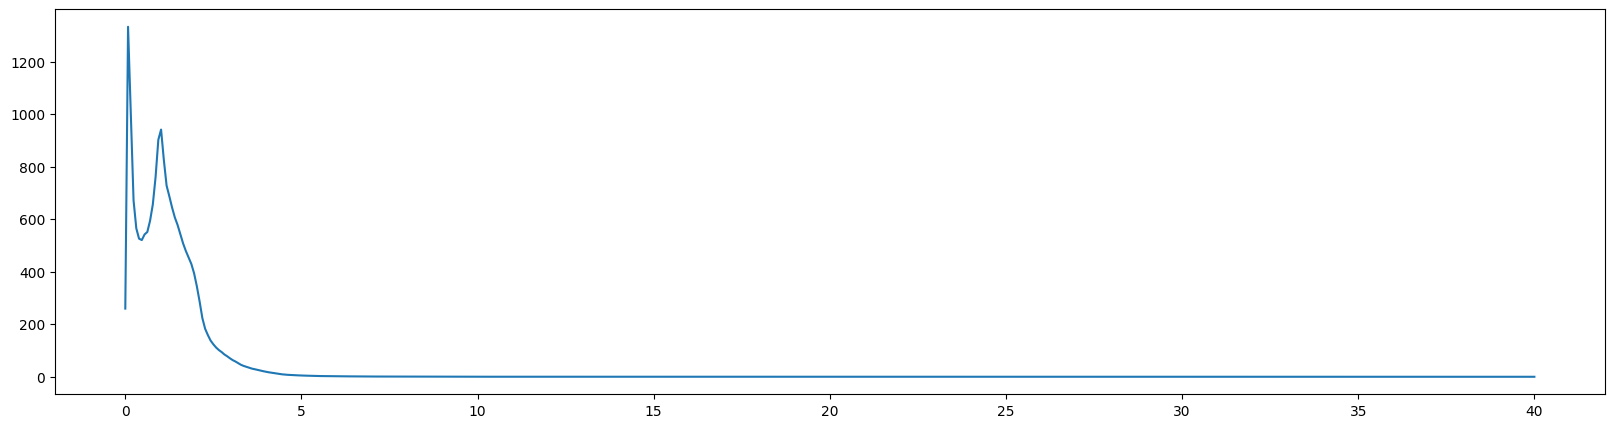

In [9]:
plot_orig_enmo_freq(smartwatch_loader_p)

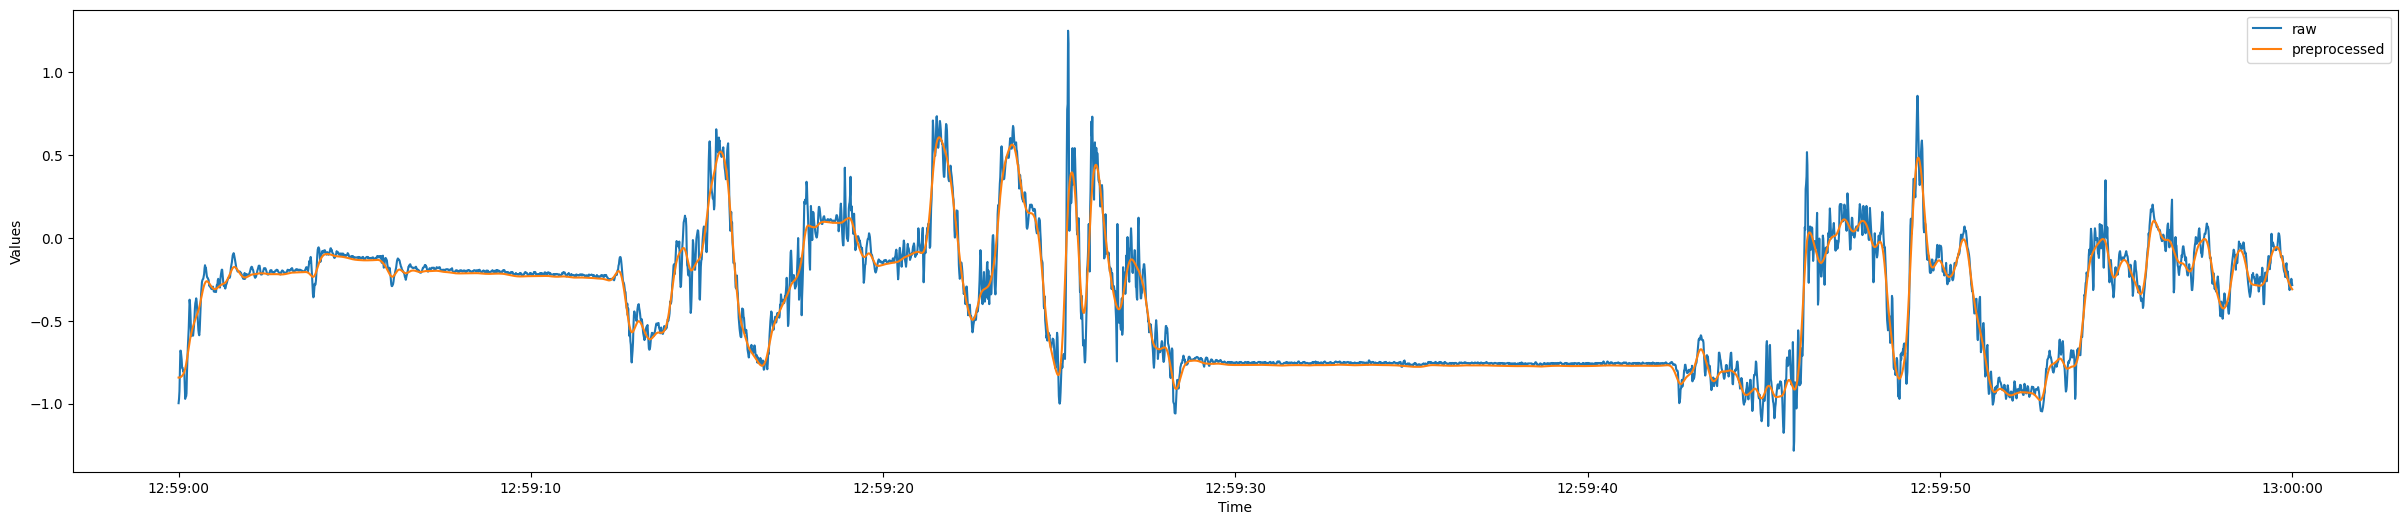

In [10]:
## Plot raw and preprocessed data
# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Select the data for the specified date from 12:00 to 13:00
time_start = pd.Timestamp('2000-01-04 12:59:00')
time_end = pd.Timestamp('2000-01-04 13:00:00')
selected_data = data[(data.index >= time_start) & (data.index <= time_end)]

# Plot raw and preprocessed data
plt.figure(figsize=(30, 6))
plt.plot(selected_data['Z_raw'], label='raw')
plt.plot(selected_data['Z'], label='preprocessed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

/var/folders/wl/n18csb_91230dq8v__mxqxxr0000gn/T/ipykernel_65089/2141091773.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


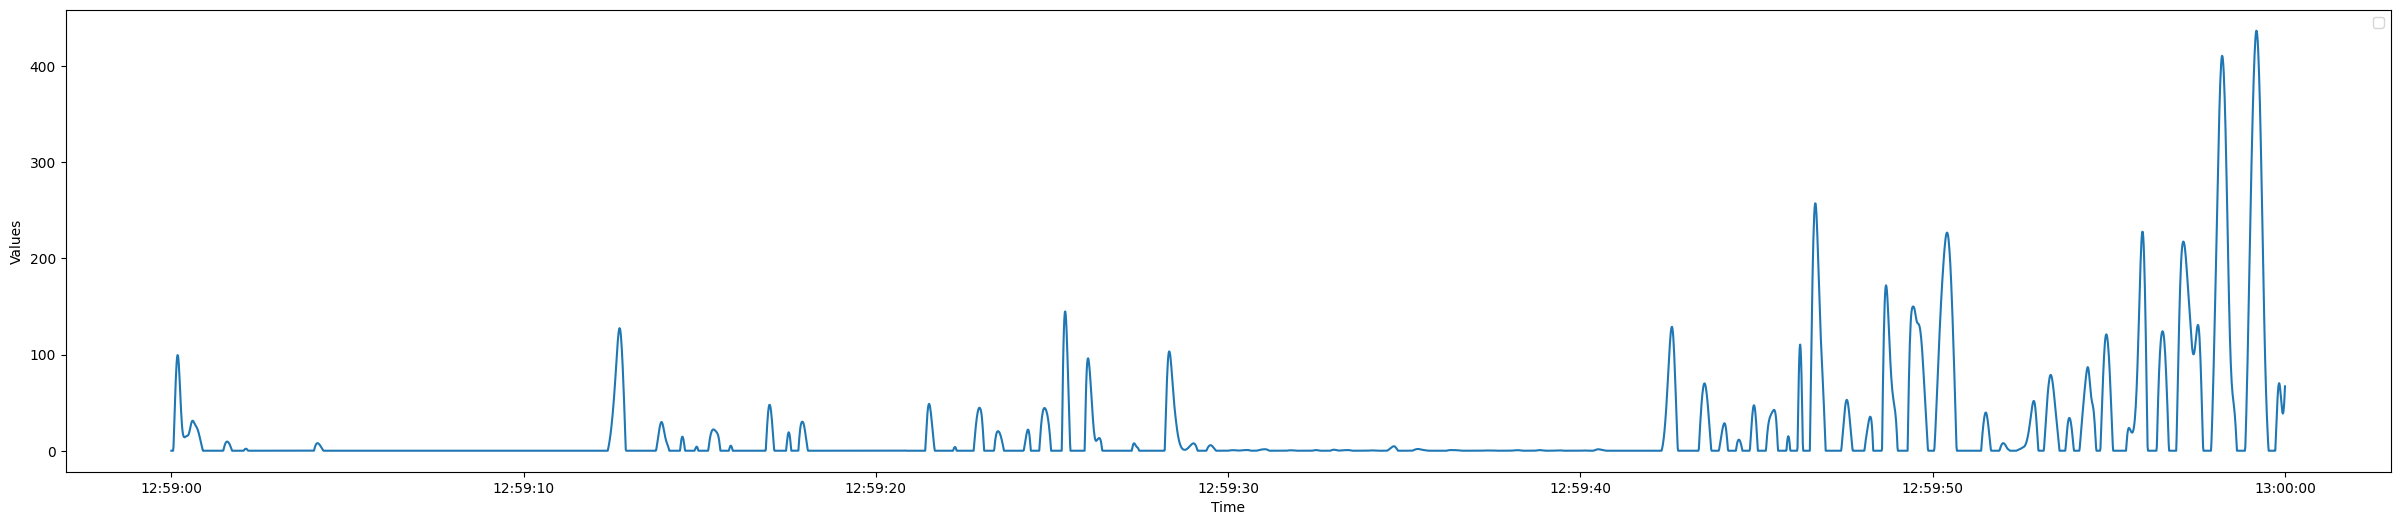

In [11]:
## Plot ENMO for same time period
plt.figure(figsize=(30, 6))
plt.plot(selected_data['ENMO'])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

### Raw Data without preprocessing

In [12]:
reload_smartwatch = True

In [13]:
if reload_smartwatch:
    smartwatch_loader = SmartwatchDataLoader(smartwatch_file_dir='../data/smartwatch/62164/', preprocess=False)
    smartwatch_loader.load_data(verbose=True)
    with open("pickle/smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("pickle/smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

Loading CSV files: 100%|██████████| 145/145 [00:14<00:00, 10.13it/s]


Loaded 41760000 accelerometer data records from ../data/smartwatch/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage
Calculated ENMO for 34560000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
load_data executed in 38.35 seconds


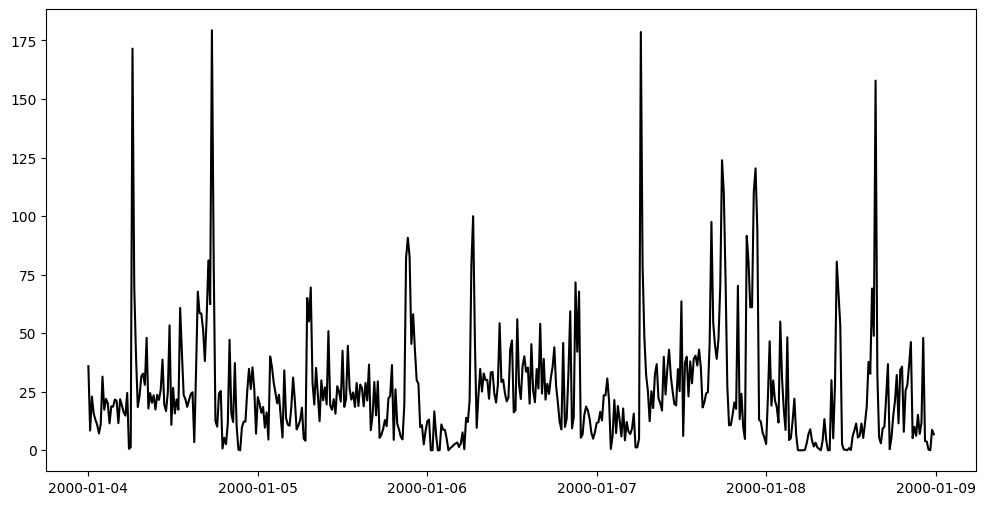

In [14]:
plot_orig_enmo(smartwatch_loader, wear=False)

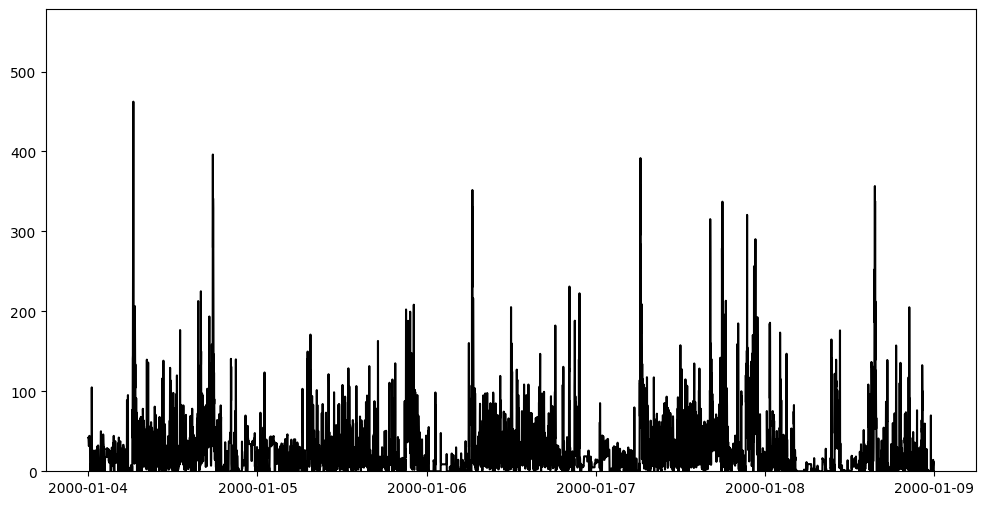

In [15]:
plot_enmo(smartwatch_loader)

In [16]:
smartwatch_loader.get_meta_data()

{'datasource': 'smartwatch', 'original_freq': 80.0}

In [17]:
data = smartwatch_loader.get_acc_data()
data.head()

,X,Y,Z,ENMO
TIMESTAMP,,,,
2000-01-04 00:00:00.000000,-0.736,0.050,0.730,37.832356
2000-01-04 00:00:00.012500,-0.736,0.056,0.730,38.138719
2000-01-04 00:00:00.025000,-0.739,0.050,0.730,39.962019
2000-01-04 00:00:00.037500,-0.739,0.056,0.736,44.486955
2000-01-04 00:00:00.050000,-0.739,0.056,0.739,46.603077


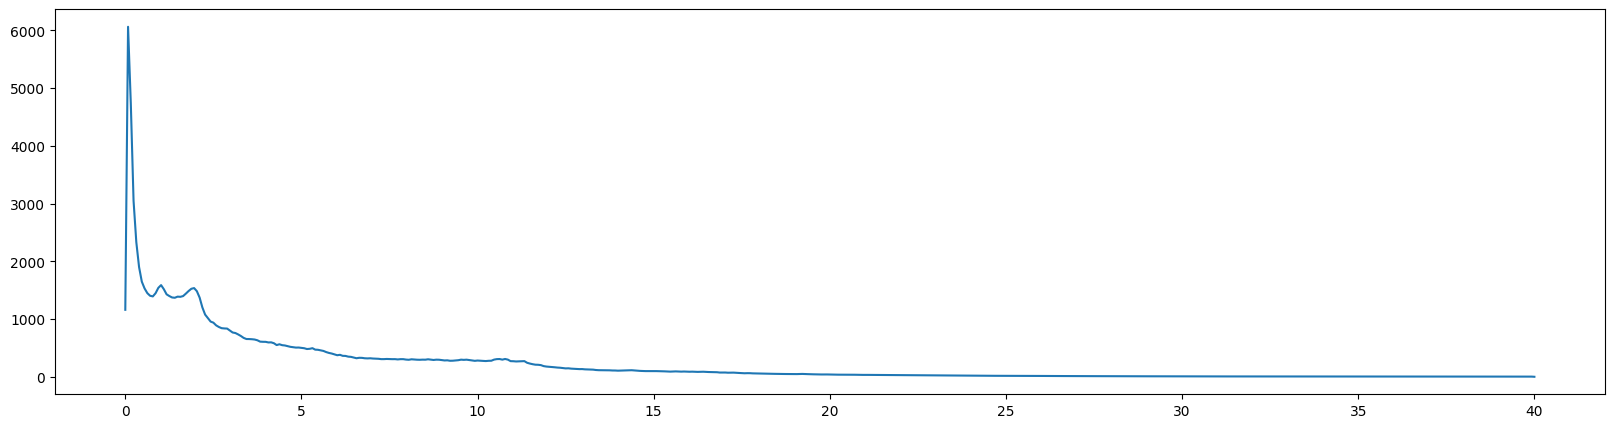

In [18]:
plot_orig_enmo_freq(smartwatch_loader)

## Compute features

In [19]:
preprocessed_features = True
if preprocessed_features:
    features = WearableFeatures(smartwatch_loader_p)
else:
    features = WearableFeatures(smartwatch_loader)
features.run()

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=False)


In [20]:
df, dict = features.get_all()
df

,MESOR,amplitude,acrophase,acrophase_time,IV,IS,RA,M10,M10_start,L5,L5_start,SB,LIPA,MVPA,TST,WASO,PTA,SRI
2000-01-04,11.741757,7.767658,3.527237,13.473052,0.654056,0.275013,0.782313,20.352063,17,2.485744,21,2.666667,0.150000,21.183333,1418,22.0,0.984722,NaN
2000-01-05,10.643782,4.669674,3.519697,13.444251,0.769063,0.382529,0.784752,18.217440,7,2.197089,4,2.033333,0.133333,21.833333,1423,17.0,0.988194,94.583333
2000-01-06,12.083607,8.340700,3.527644,13.474606,0.747853,0.347052,0.869332,19.041800,6,1.331042,2,3.816667,0.083333,20.100000,1333,107.0,0.925694,83.611111
2000-01-07,16.707092,9.106654,4.201194,16.047381,0.686481,0.250888,0.895666,28.119289,22,1.547628,3,2.333333,0.150000,21.516667,1410,30.0,0.979167,82.083333
2000-01-08,10.369922,4.166241,4.816715,18.398498,0.511903,0.335773,0.903370,18.099484,15,0.918875,12,4.583333,0.266667,19.150000,1313,127.0,0.911806,78.194444


In [21]:
features.get_enmo_data()

,ENMO,wear,date,cosinor_by_day_fitted,time,cos,sin,cosinor_multiday_fitted,sleep
TIMESTAMP,,,,,,,,,
2000-01-04 00:00:00,8.754015,1.0,2000-01-04,4.531904,1,0.999990,4.363309e-03,7.634904,0.0
2000-01-04 00:01:00,8.938513,1.0,2000-01-04,4.519361,2,0.999962,8.726535e-03,7.617695,0.0
2000-01-04 00:02:00,6.991243,1.0,2000-01-04,4.506956,3,0.999914,1.308960e-02,7.600576,0.0
2000-01-04 00:03:00,4.731088,1.0,2000-01-04,4.494688,4,0.999848,1.745241e-02,7.583547,0.0
2000-01-04 00:04:00,4.731088,1.0,2000-01-04,4.482558,5,0.999762,2.181489e-02,7.566607,0.0
...,...,...,...,...,...,...,...,...,...
2000-01-08 23:55:00,2.407639,1.0,2000-01-08,10.876032,7196,0.999848,-1.745241e-02,7.722275,0.0
2000-01-08 23:56:00,0.000000,1.0,2000-01-08,10.857983,7197,0.999914,-1.308960e-02,7.704624,0.0
2000-01-08 23:57:00,0.510930,1.0,2000-01-08,10.839925,7198,0.999962,-8.726535e-03,7.687062,0.0


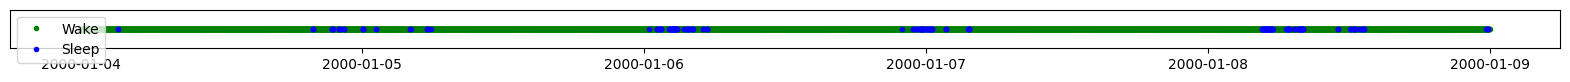

In [22]:
features.plot_sleep_predictions()

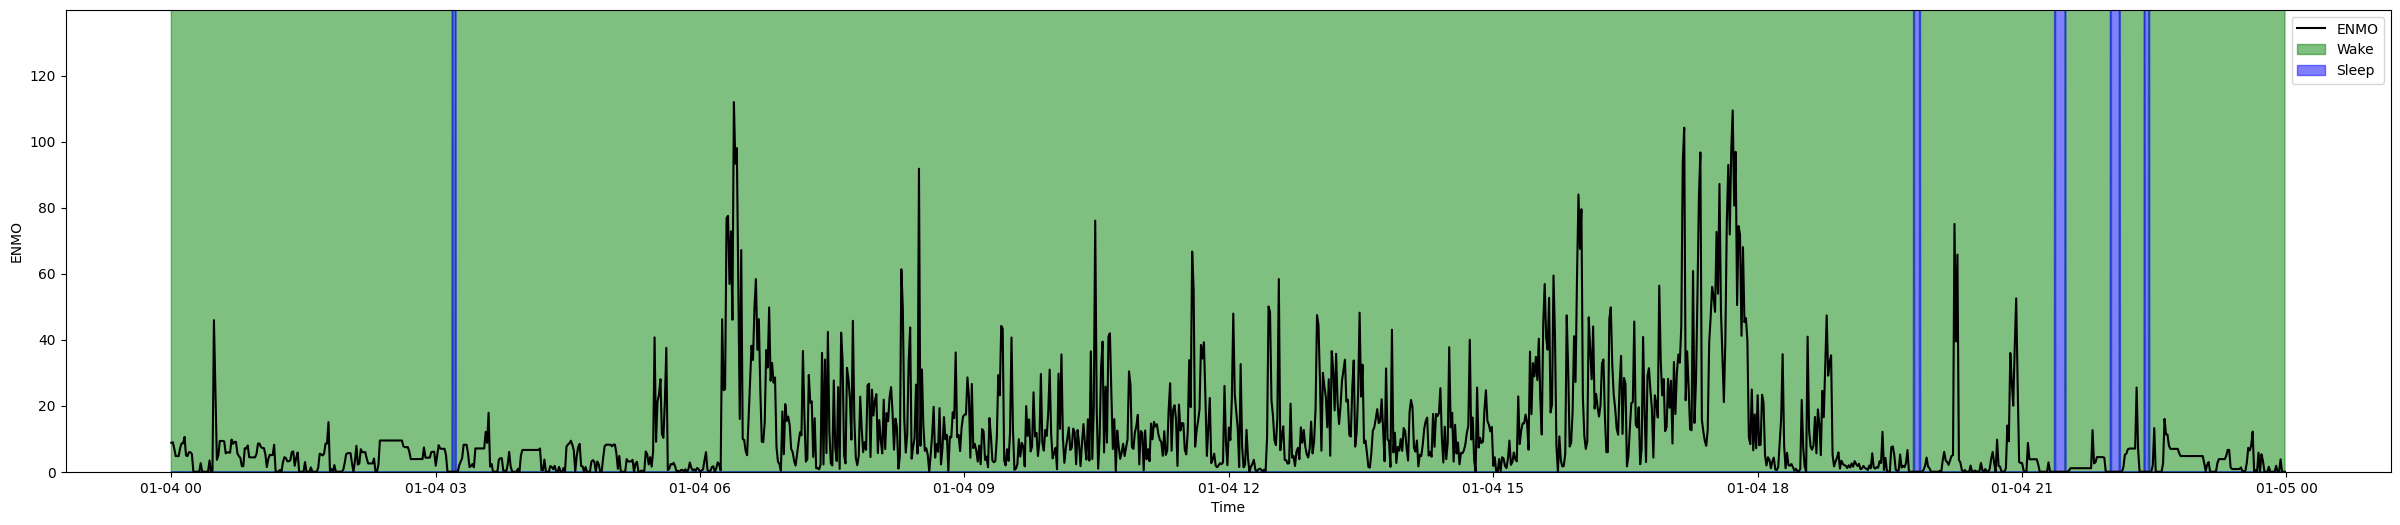

In [23]:
features.plot_sleep_predictions(simple=False, start_date=pd.Timestamp('2000-01-04 00:00:00'), end_date=pd.Timestamp('2000-01-04 23:59:00'))

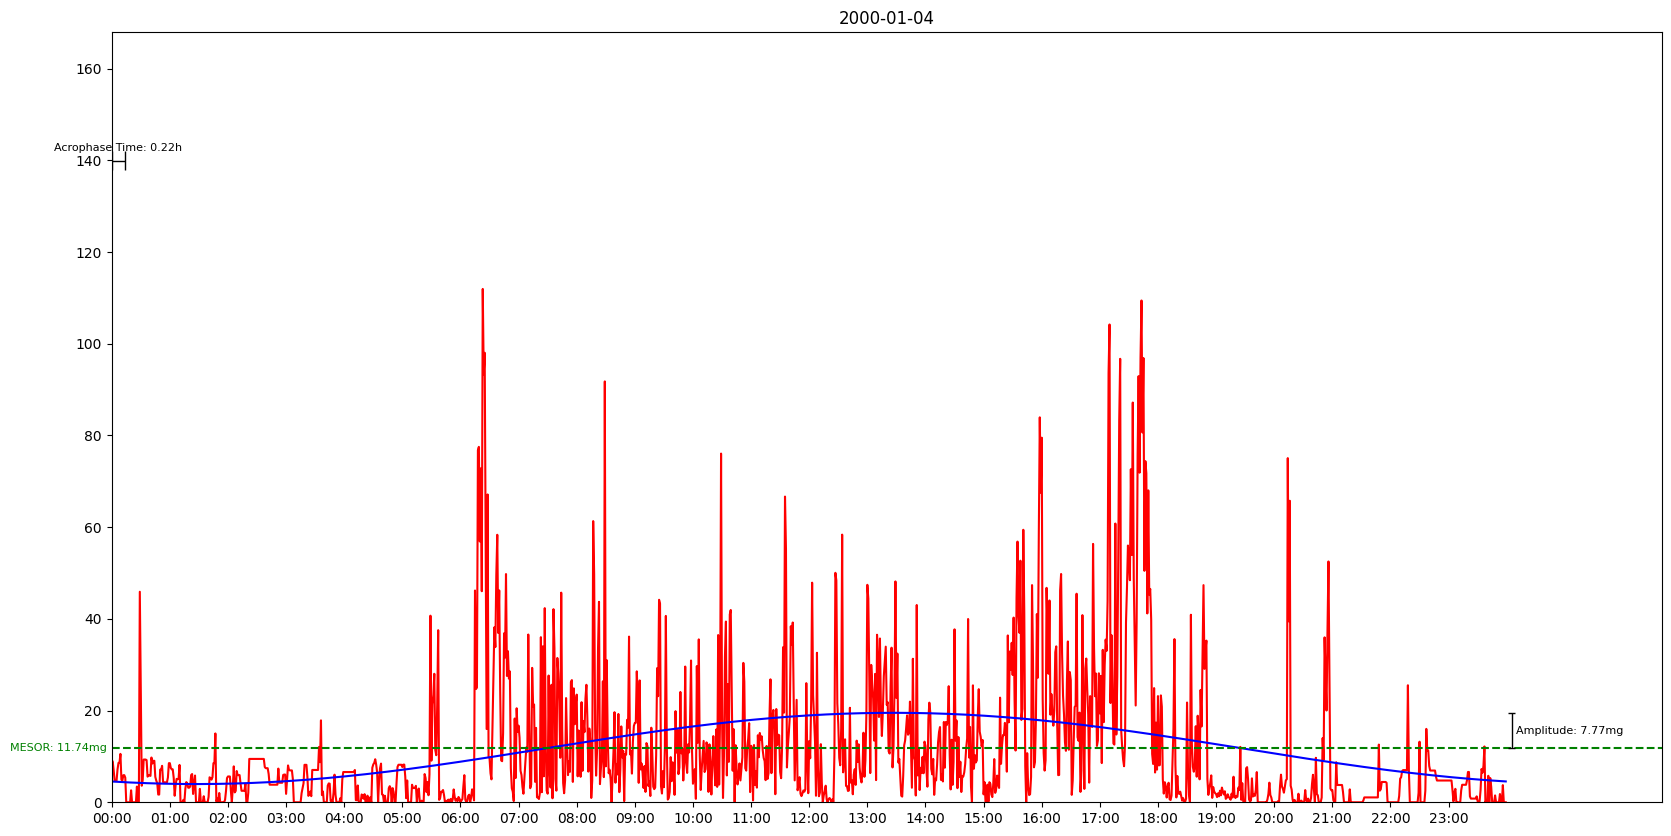

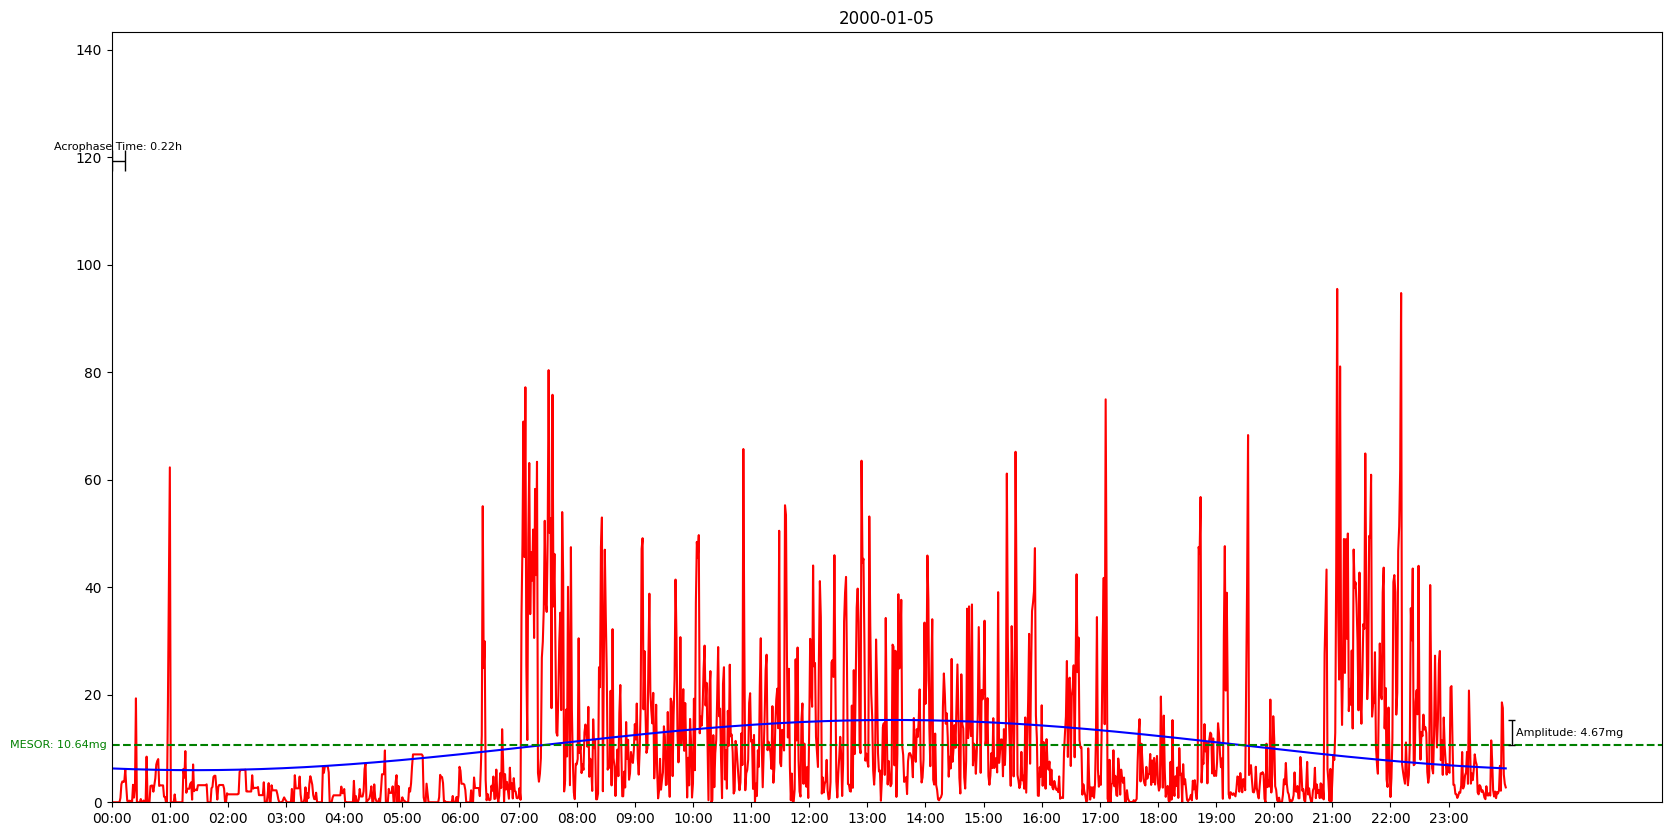

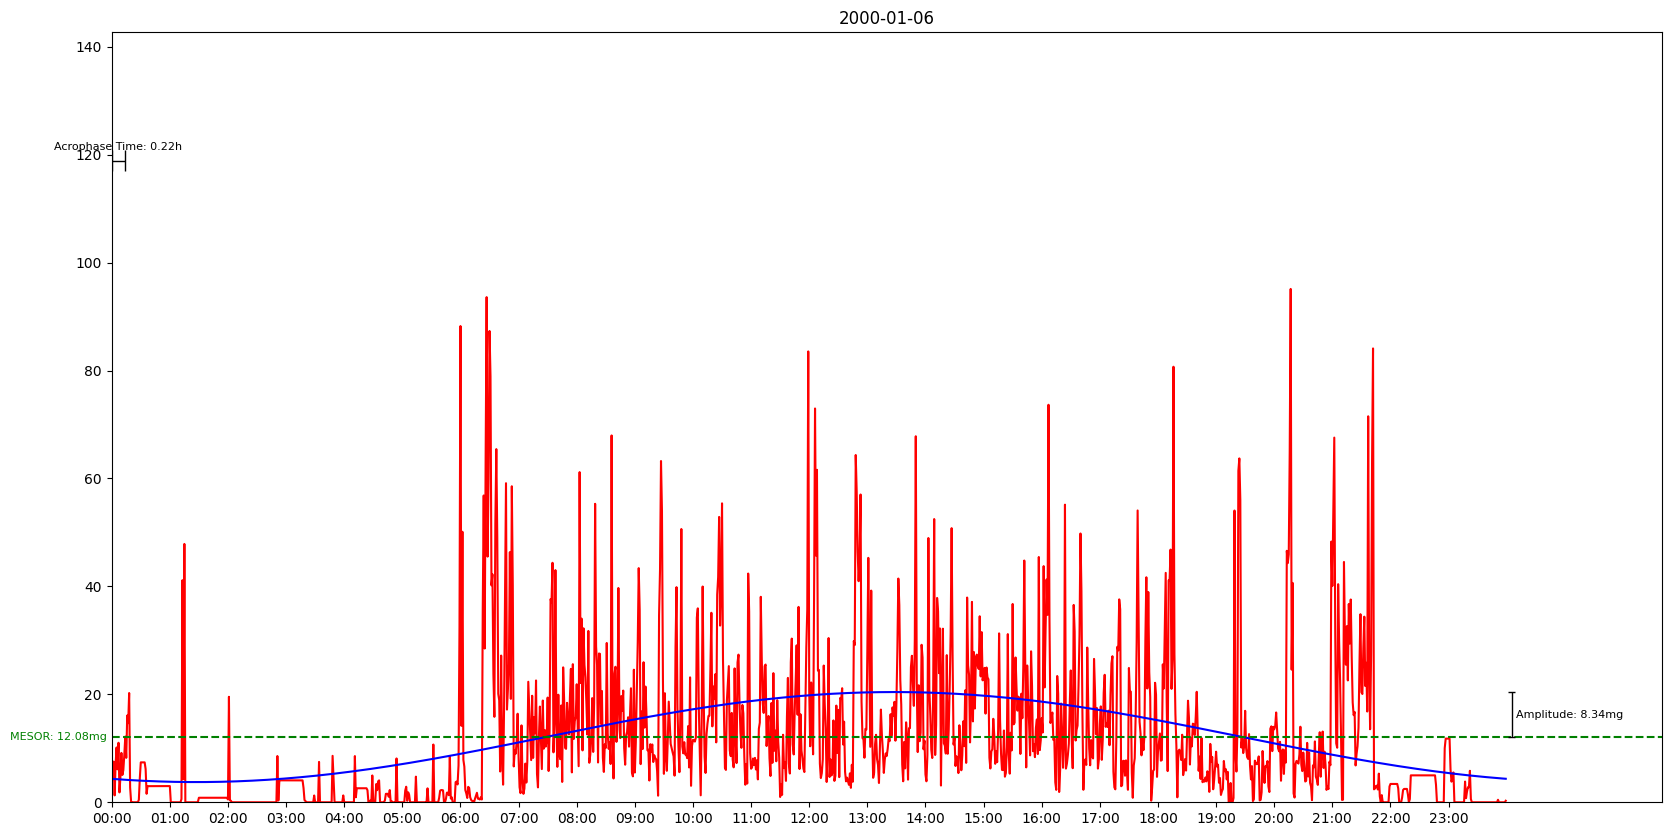

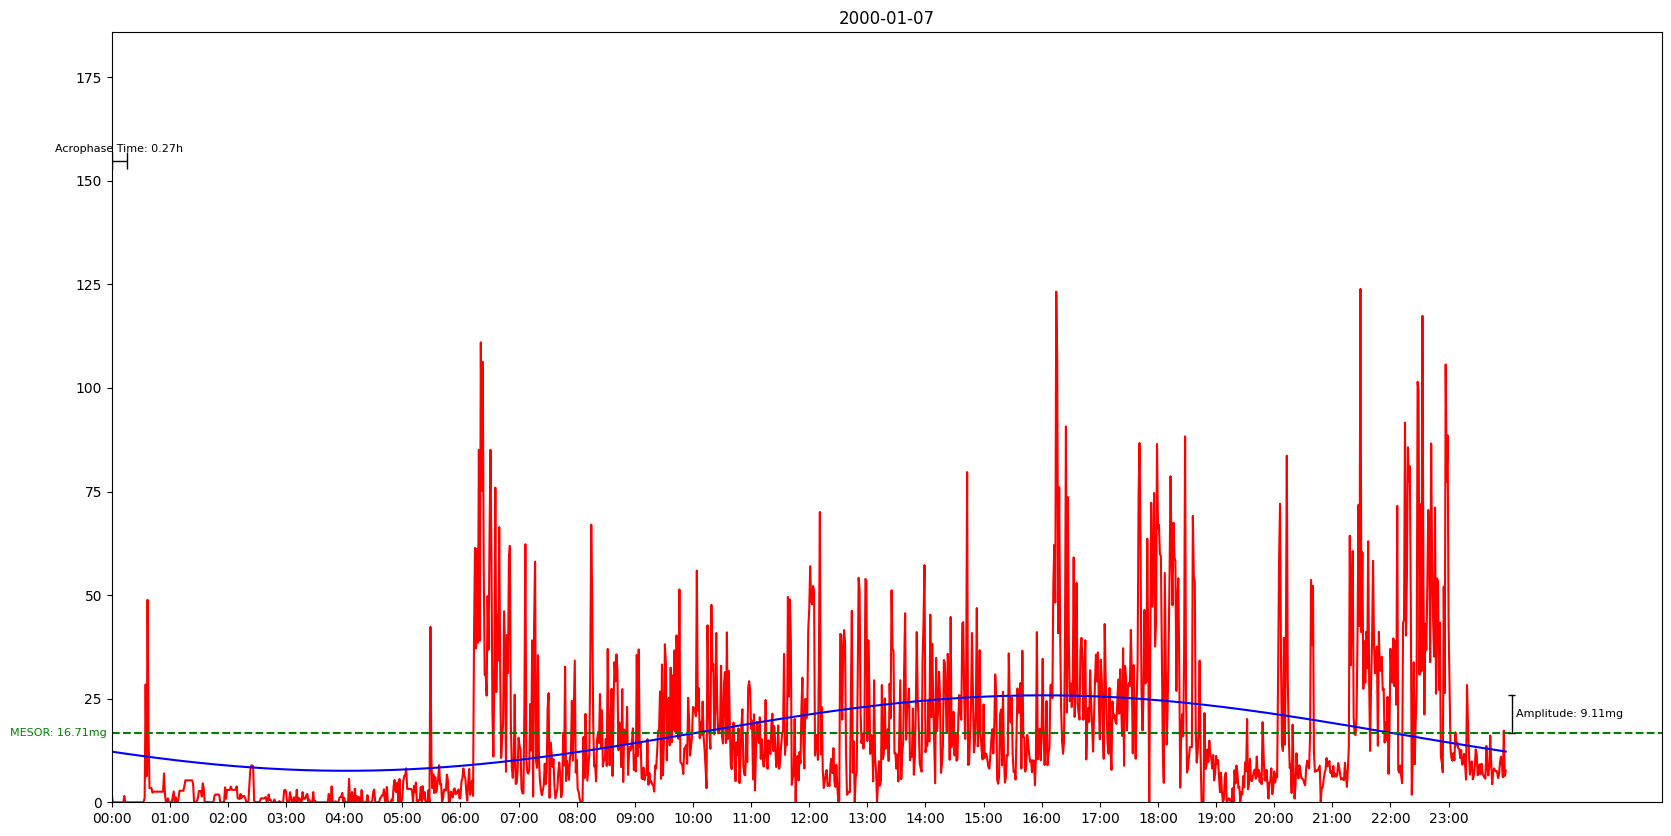

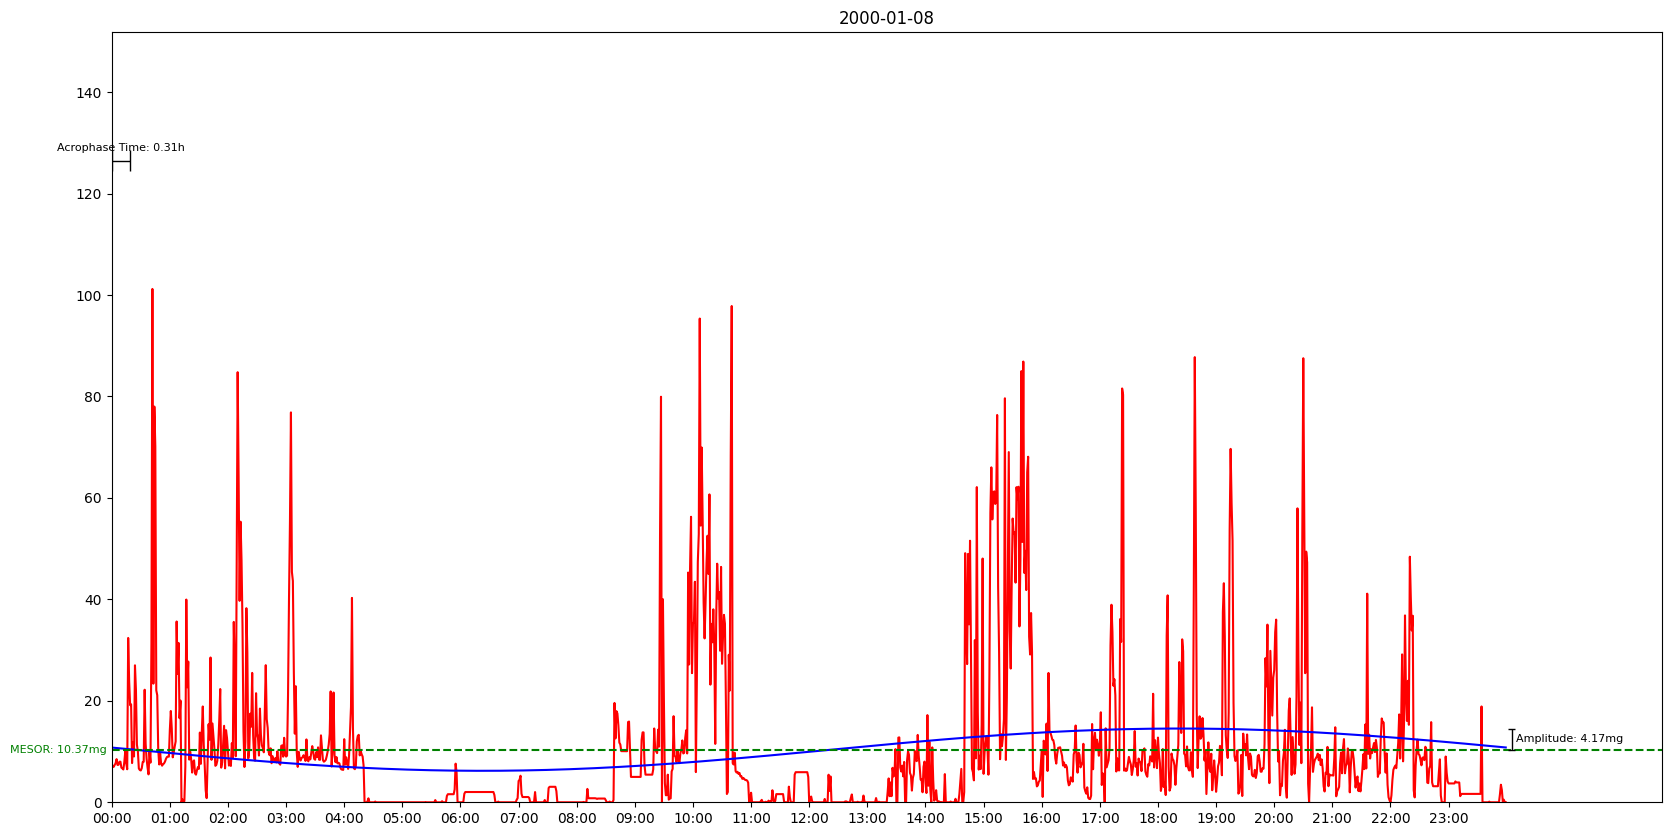

In [24]:
features.plot_cosinor(multiday=False)

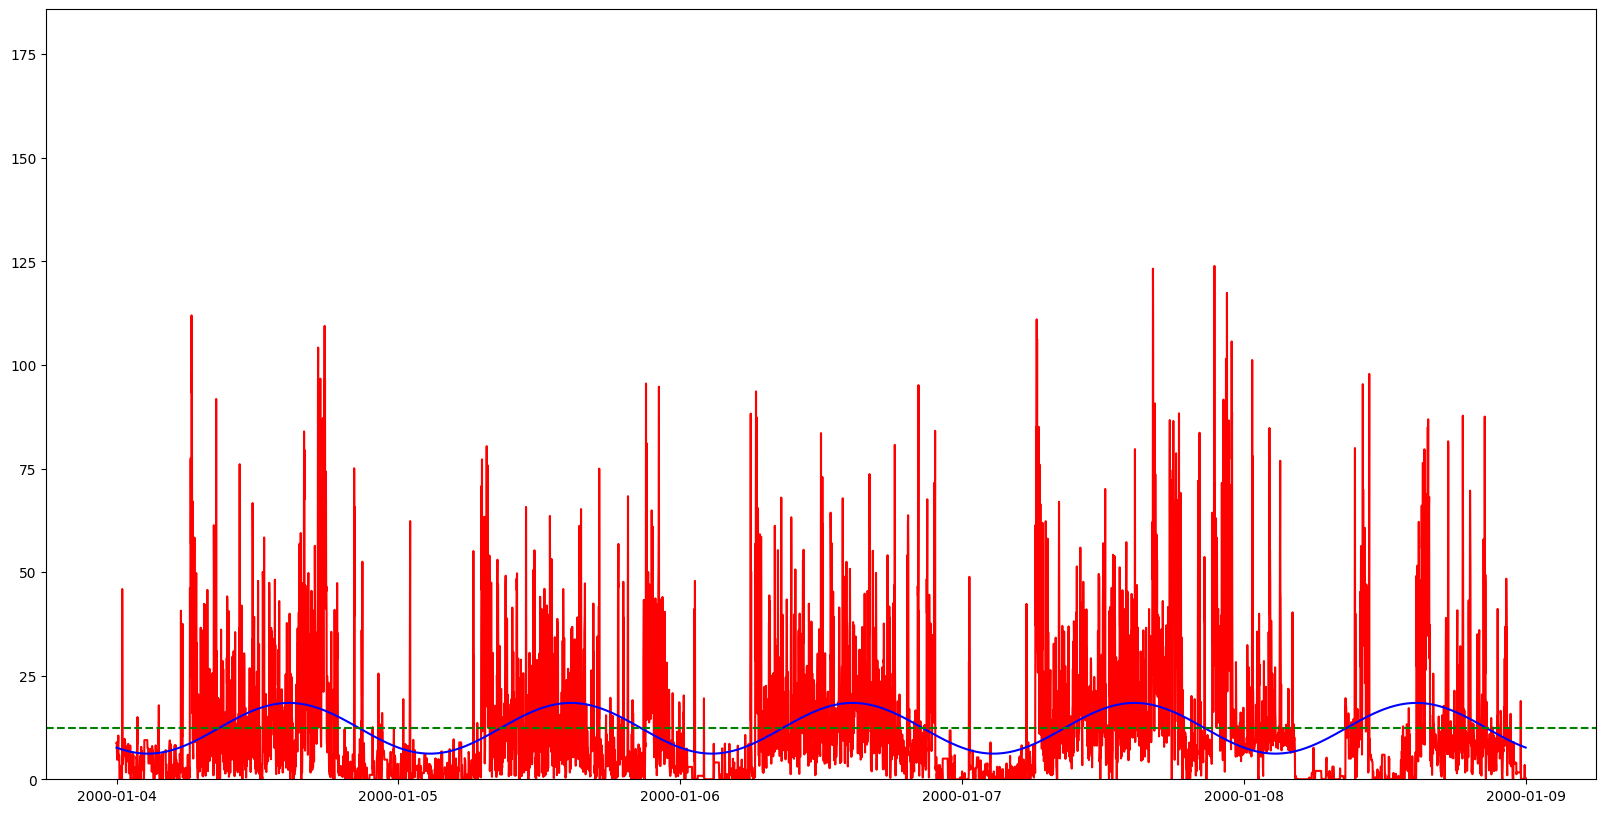

In [25]:
features.plot_cosinor(multiday=True)

In [26]:
dict

{'MESOR': 12.309231930308577,
 'amplitude': 6.122440519840331,
 'acrophase': 3.8480761298242445,
 'acrophase_time': 14.698568098931004}

In [ ]:
s